# Model training

In the notebook, the created feature dataset is used to train a xgboost model.

In [26]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('mode.chained_assignment', None)

In [27]:
# file of processed data
data_file = 'processed_data.csv'

In [28]:
data = pd.read_csv(data_file, usecols=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
data

,v0,v1,v2,a0,a1,a2,brCh0,brCh1,brCh2,max(a),...,sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh),class
0,5.168146,3.650481,6.007676,-0.068985,0.235720,-0.257458,5.747349,3.033142,2.036242,0.235720,...,14.826303,4.942101,-5.565769,5.747349,2.036242,3.711107,10.816733,3.605578,-2.016361,car
1,3.650481,6.007676,1.630896,0.235720,-0.257458,0.233489,3.033142,2.036242,7.095249,0.235720,...,11.289053,3.763018,-2.492750,7.095249,2.036242,5.059007,12.164633,4.054878,-1.409317,car
2,0.804121,13.234774,5.842852,0.163561,-0.098559,-0.135605,13.107961,86.047772,61.764313,0.163561,...,19.881748,6.627249,13.163541,86.047772,13.107961,72.939812,160.920045,53.640015,-40.792249,car
3,13.234774,5.842852,2.181507,-0.098559,-0.135605,0.053815,86.047772,61.764313,18.378587,0.053815,...,21.259133,7.086378,-2.895371,86.047772,18.378587,67.669185,166.190672,55.396891,-690.138768,car
4,5.842852,2.181507,3.150172,-0.135605,0.053815,-0.263767,61.764313,18.378587,3.993537,0.053815,...,11.174531,3.724844,-1.285480,61.764313,3.993537,57.770776,84.136436,28.045479,149.284403,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654774,1.971871,1.711805,1.735315,-0.130033,0.011755,-0.268790,0.884603,2.193596,0.587693,0.011755,...,5.418991,1.806330,-0.497059,2.193596,0.587693,1.605903,3.665892,1.221964,0.050793,walk
1654775,1.711805,1.735315,1.197736,0.011755,-0.268790,0.129213,2.193596,0.587693,24.300357,0.129213,...,4.644856,1.548285,-0.379244,24.300357,0.587693,23.712664,27.081647,9.027216,20.244541,walk
1654776,1.897607,0.822229,0.727151,-0.537689,-0.047539,-0.129246,5.575816,21.620370,49.870767,-0.047539,...,3.446987,1.148996,0.024718,49.870767,5.575816,44.294951,77.066953,25.688984,-62.986663,walk
1654777,0.822229,0.727151,0.468659,-0.047539,-0.129246,-0.114179,21.620370,49.870767,27.563477,-0.047539,...,2.018040,0.672680,0.013831,49.870767,21.620370,28.250396,99.054614,33.018205,-216.239628,walk


In [29]:
# Create training and test sets
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [30]:
# Train XGBoost Classifier, used Gridsearch to find best parameters
xgb = XGBClassifier()

parameter_space = {
    'objective': ['binary:logistic'],
    'learning_rate': [0.2],
    'max_depth': [10],
    'min_child_weight': [8],
    'subsample': [0.4],
    'n_estimators': [30]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(xgb, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.1min finished


Best parameters found:
 {'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 8, 'n_estimators': 30, 'objective': 'binary:logistic', 'subsample': 0.4}


In [31]:
# Evaluate model
preds = clf.predict(X_test)

print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds, labels=['car', 'walk']))

              precision    recall  f1-score   support

         car       0.95      0.78      0.86    121972
        walk       0.89      0.97      0.93    208984

    accuracy                           0.90    330956
   macro avg       0.92      0.88      0.89    330956
weighted avg       0.91      0.90      0.90    330956

0.9048634863848971
[[ 95712  26260]
 [  5226 203758]]


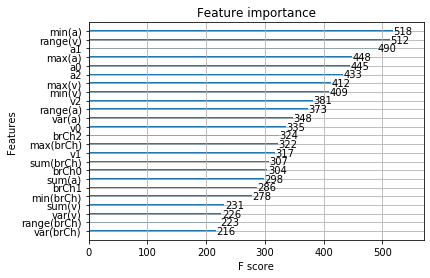

In [35]:
# Plot feature importance (F Score) 
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(clf.best_estimator_)

In [37]:
# Export model to CoreML file format
import coremltools
coreml = coremltools.converters.xgboost.convert(clf.best_estimator_, 
                                                list(data.iloc[:,:-1].columns.values), 
                                                mode="classifier")
coreml.save('trans_mode.mlmodel')

In [39]:
# Save model for later use
import joblib
joblib.dump(clf.best_estimator_, "trans_mode.txt") 

['trans_mode.txt']